In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [21]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [22]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [23]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
mode=df['Gender'].mode()[0]
df['Gender'].fillna(mode, inplace=True)

Here we fill na values in column gender with mode.

In [25]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [26]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [83]:

df1 = df.dropna(subset=['Self_Employed','Married'], axis=0)

In [84]:
df1.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     13
Credit_History       44
Property_Area         0
Loan_Status           0
dtype: int64

In [85]:
df2 = df1.dropna(subset=['Credit_History'], axis=0)

In [86]:
df2.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     13
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [87]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [88]:
mean = df2['LoanAmount'].mean()
mean

145.2757281553398

In [89]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [90]:
df2['Dependents'] = df2['Dependents'].str.replace('+', '').astype(float)

In [91]:
df2['Dependents'].unique()

array([ 0.,  1.,  2.,  3., nan])

In [92]:
median_dependents = df2['Dependents'].median()
median_dependents

0.0

In [93]:
df2['Loan_Amount_Term'].unique()

array([360., 120.,  nan, 180.,  60., 300., 480., 240.,  36.,  84.])

In [94]:
median_Loan_Amount_Term = df2['Loan_Amount_Term'].median()
median_Loan_Amount_Term

360.0

In [95]:
df2['Dependents'].fillna(median_dependents, inplace=True)

In [189]:
df2['Loan_Amount_Term'].fillna(median_Loan_Amount_Term, inplace=True)

In [191]:
df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [192]:
df2['LoanAmount'] = df2['LoanAmount'].fillna(145)

In [193]:
df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

After adding mean and meadian value in place in null value , now our dataset is perfect as it has no null value.

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

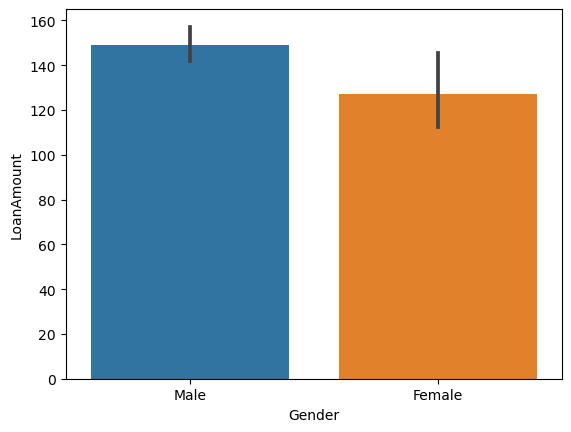

In [100]:
sns.barplot(df2['Gender'],df2['LoanAmount'])

As we see Loan amount taken by Male is higher than loan amount taken by female.

<AxesSubplot:xlabel='Gender', ylabel='Loan_Amount_Term'>

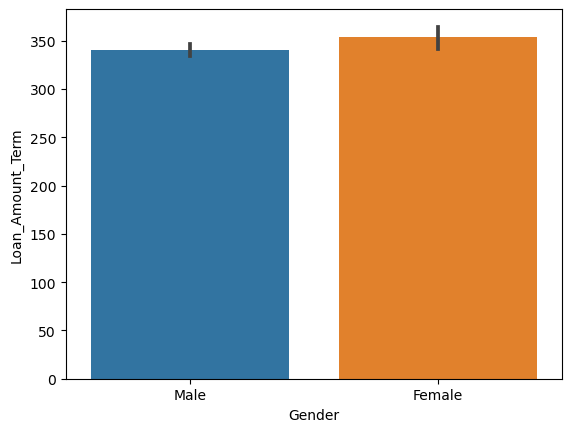

In [101]:
sns.barplot(df2['Gender'],df2['Loan_Amount_Term'])

 from above chart we can say Female loan amount term duration little bit higher compare to male.

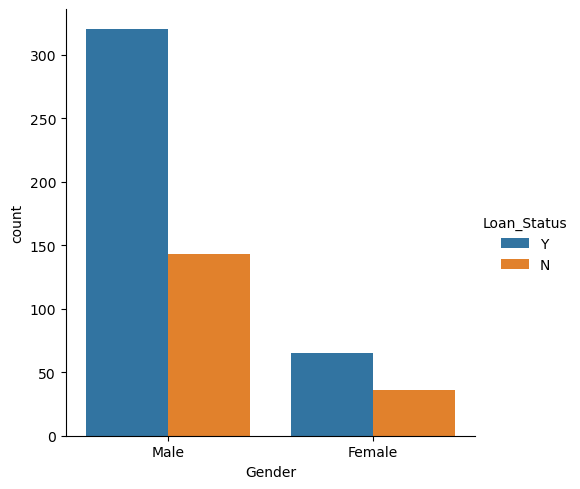

In [47]:
sns.catplot(x ="Gender", hue ="Loan_Status",kind ="count", data = df2)

As we see Male has more more loan count compare to female , but we can also see rejection rate for both is also similar looks around 50 %.

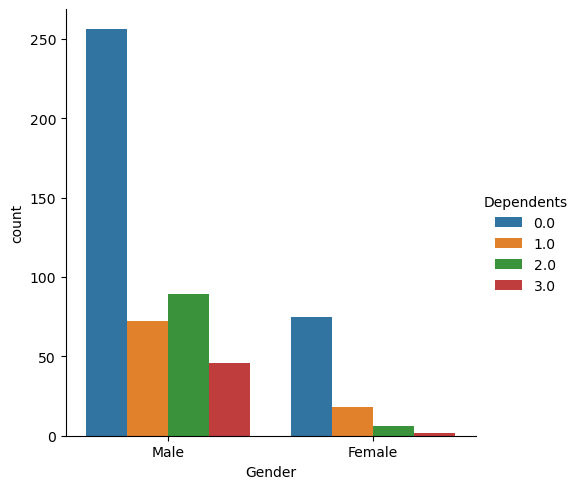

In [48]:
sns.catplot(x ="Gender", hue ="Dependents",kind ="count", data = df2)

From above chart it clearly states that male has more dependents compare to female.

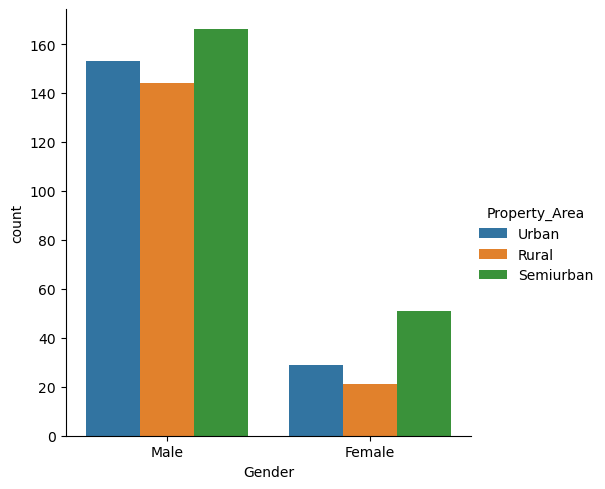

In [49]:
sns.catplot(x ="Gender", hue ="Property_Area",kind ="count", data = df2)

as we see both more no of male and female has property area in semi urban area.

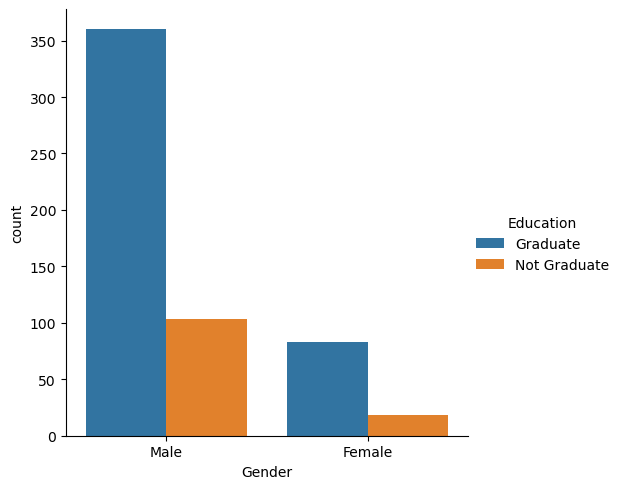

In [50]:
sns.catplot(x ="Gender", hue ="Education",kind ="count", data = df2)

as we see 350+ male graduates and 90+ female graduaate for loan application.

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

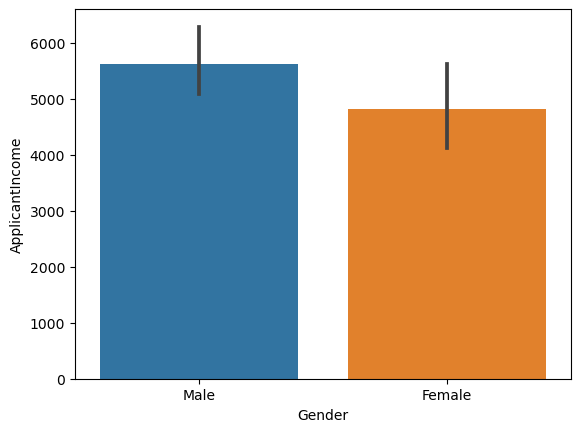

In [51]:
sns.barplot(df2['Gender'],df2['ApplicantIncome'])

for loan application , male applicate total is more compare to female income.


<AxesSubplot:xlabel='Gender', ylabel='CoapplicantIncome'>

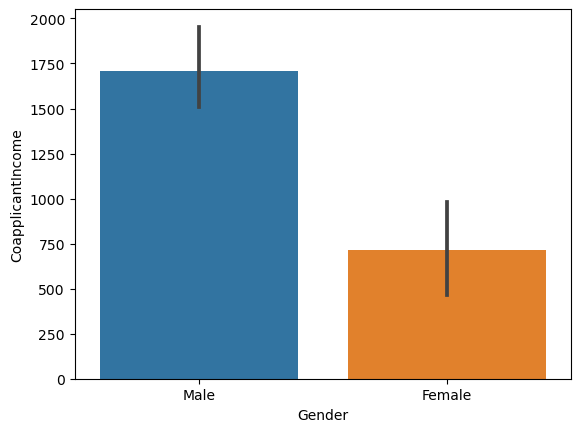

In [52]:
sns.barplot(df2['Gender'],df2['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

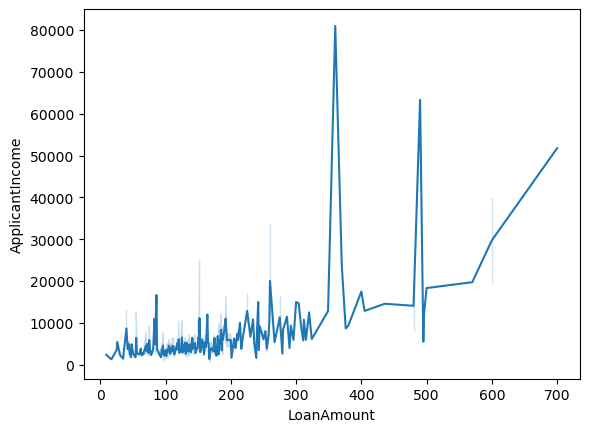

In [53]:
sns.lineplot(df2['LoanAmount'],df2['ApplicantIncome'])

as we see from chart as applicant income increases loan amount is also increses.

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

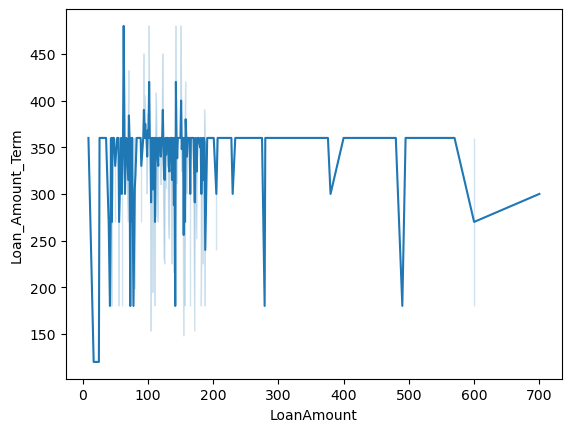

In [54]:
sns.lineplot(df2['LoanAmount'],df2['Loan_Amount_Term'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

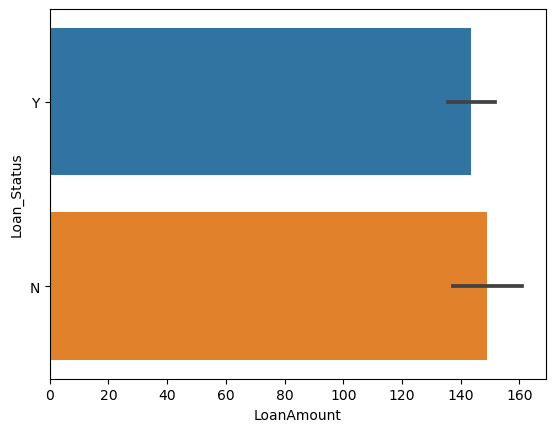

In [55]:
sns.barplot(df2['LoanAmount'],df2['Loan_Status'])
#sns.catplot(x ="LoanAmount", hue ="Loan_Status",kind ="count", data = df2)

<AxesSubplot:xlabel='Credit_History', ylabel='Gender'>

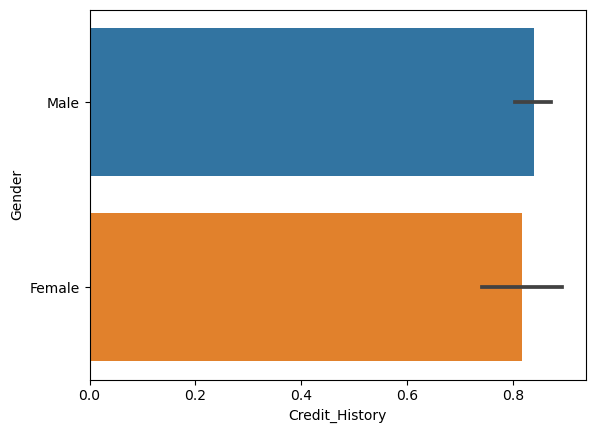

In [102]:
sns.barplot(df2['Credit_History'],df2['Gender'])

Dependents              AxesSubplot(0.125,0.53;0.110714x0.35)
ApplicantIncome      AxesSubplot(0.257857,0.53;0.110714x0.35)
CoapplicantIncome    AxesSubplot(0.390714,0.53;0.110714x0.35)
LoanAmount           AxesSubplot(0.523571,0.53;0.110714x0.35)
Loan_Amount_Term     AxesSubplot(0.656429,0.53;0.110714x0.35)
Credit_History       AxesSubplot(0.789286,0.53;0.110714x0.35)
dtype: object

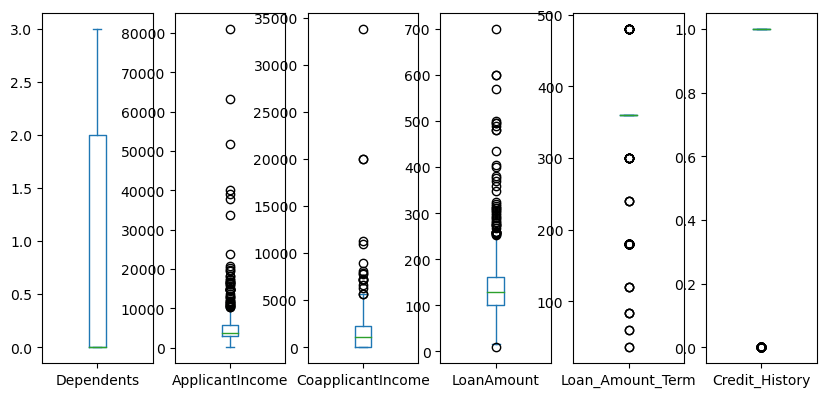

In [57]:
df2.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

In [109]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['Gender'] = le.fit_transform(df2['Gender'])
df2['Education'] = le.fit_transform(df2['Education'])
df2['Property_Area'] = le.fit_transform(df2['Property_Area'])
df2['Loan_Status'] = le.fit_transform(df2['Loan_Status'])
df2['Married'] = le.fit_transform(df2['Married'])
df2['Self_Employed'] = le.fit_transform(df2['Self_Employed'])

In [194]:
df3=df2.drop(['Loan_ID'],axis=1)
df3

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,145.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,2,1


<AxesSubplot:>

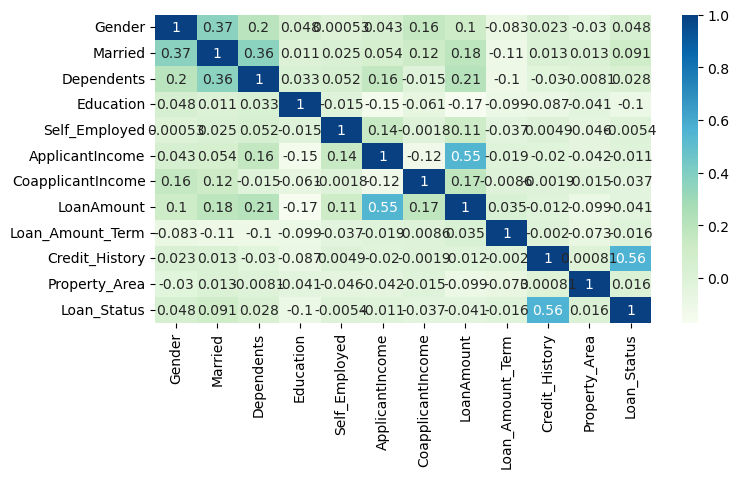

In [111]:
plt.figure(figsize=(8,4))
sns.heatmap(df3.corr(),cmap='GnBu',annot=True)


Loan application status is positive co relate with credit history and amount of loan.

In [195]:
df3.skew()

Gender              -1.726208
Married             -0.632901
Dependents           0.986764
Education            1.391703
Self_Employed        2.078603
ApplicantIncome      6.491783
CoapplicantIncome    5.936300
LoanAmount           2.674942
Loan_Amount_Term    -2.358267
Credit_History      -1.815180
Property_Area       -0.062399
Loan_Status         -0.739132
dtype: float64

In [197]:
df3['ApplicantIncome']=np.cbrt(df1['ApplicantIncome'])
df3['CoapplicantIncome']=np.cbrt(df1['CoapplicantIncome'])


Here we remove skewness for better performance model.

In [198]:
df3.skew()

Gender              -1.726208
Married             -0.632901
Dependents           0.986764
Education            1.391703
Self_Employed        2.078603
ApplicantIncome      2.026115
CoapplicantIncome    0.169833
LoanAmount           2.674942
Loan_Amount_Term    -2.358267
Credit_History      -1.815180
Property_Area       -0.062399
Loan_Status         -0.739132
dtype: float64

In [199]:
df3.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [200]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [221]:
x=df3.iloc[:,0:-1]
y=df3.iloc[:,-1]

In [222]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [223]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [224]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred=lg.predict(x_test)
pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [205]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [225]:
accuracy_score(y_test,pred)

0.8260869565217391

as we see here we have 82% accuracy in logistic regression model.

In [226]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 28  25]
 [  3 105]]
              precision    recall  f1-score   support

           0       0.90      0.53      0.67        53
           1       0.81      0.97      0.88       108

    accuracy                           0.83       161
   macro avg       0.86      0.75      0.77       161
weighted avg       0.84      0.83      0.81       161



In [208]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score

In [240]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8322981366459627
[[ 33  20]
 [  7 101]]
              precision    recall  f1-score   support

           0       0.82      0.62      0.71        53
           1       0.83      0.94      0.88       108

    accuracy                           0.83       161
   macro avg       0.83      0.78      0.80       161
weighted avg       0.83      0.83      0.83       161



as we see here we have 83% accuracy in Random Forest Classifier model.

In [234]:
predRFC

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [241]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8012422360248447
[[ 28  25]
 [  7 101]]
              precision    recall  f1-score   support

           0       0.80      0.53      0.64        53
           1       0.80      0.94      0.86       108

    accuracy                           0.80       161
   macro avg       0.80      0.73      0.75       161
weighted avg       0.80      0.80      0.79       161



as we see here we have 80% accuracy in Ada Boost Classifier model.

In [229]:
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8136645962732919
[[ 30  23]
 [  7 101]]
              precision    recall  f1-score   support

           0       0.81      0.57      0.67        53
           1       0.81      0.94      0.87       108

    accuracy                           0.81       161
   macro avg       0.81      0.75      0.77       161
weighted avg       0.81      0.81      0.80       161



as we see here we have 81% accuracy in Gradient Boost Classifier model.

In [242]:
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.7577639751552795
[[35 18]
 [21 87]]
              precision    recall  f1-score   support

           0       0.62      0.66      0.64        53
           1       0.83      0.81      0.82       108

    accuracy                           0.76       161
   macro avg       0.73      0.73      0.73       161
weighted avg       0.76      0.76      0.76       161



as we see here we have 75% accuracy in Bagging Classifier model.

In [244]:
ETC = ExtraTreesClassifier()
ETC.fit(x_train, y_train)
predETC = ETC.predict(x_test)
print(accuracy_score(y_test, predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

0.7763975155279503
[[32 21]
 [15 93]]
              precision    recall  f1-score   support

           0       0.68      0.60      0.64        53
           1       0.82      0.86      0.84       108

    accuracy                           0.78       161
   macro avg       0.75      0.73      0.74       161
weighted avg       0.77      0.78      0.77       161



as we see here we have 77% accuracy in Extra Trees Classifier model.

In [147]:
from sklearn.model_selection import cross_val_score

In [237]:
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print ('Differencr between acuuracy score and cross validation score is', accuracy_score(y_test, predRFC) - score.mean())

[0.80373832 0.72897196 0.79439252 0.78504673 0.81308411]
0.7850467289719626
Differencr between acuuracy score and cross validation score is 0.05346258779822377


In [238]:
print('Predicted score:',predRFC)
print('actual score',y_test)

Predicted score: [0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 1 1]
actual score 136    0
151    1
176    1
280    0
94     1
      ..
37     1
132    1
570    1
424    1
555    1
Name: Loan_Status, Length: 161, dtype: int64


here above we can see actual loan status and predicted loan status by our best model random forest classifier which has 83% accuracy.

In [246]:
import joblib
joblib.dump(predRFC,'Loan_application_status.pkl')

['Loan_application_status.pkl']